In [1]:
import numpy as np
import pandas as pd

In [2]:
# Import games data
df_games = pd.read_csv('/Users/koplo/Documents/chess_analysis_proj/game_game_info.csv')
df_games.head()

,game_id,game_order,event,site,date_played,round,white,black,result,white_elo,...,winner_loser_elo_diff,eco,termination,time_control,utc_date,utc_time,variant,ply_count,date_created,file_name
0,58887a86-5c84-45ac-b959-c72377a2dfd3,1,Rated Rapid game,https://lichess.org/hvfE6FOz,2021.09.22,?,awfedorable,K0P0L0,0-1,1963,...,-74,B33,Normal,600+0,2021.09.22,18:21:58,Standard,NaN,2021-09-23T06:37:01+0000,game.pgn
1,aadc9778-0bad-4f79-90c5-569e09efb592,2,Rated Rapid game,https://lichess.org/7TtUO2i1,2021.09.22,?,K0P0L0,kaffeberra,1-0,1883,...,37,C41,Normal,600+0,2021.09.22,18:12:31,Standard,NaN,2021-09-23T06:37:01+0000,game.pgn
2,1095f764-8e18-4a29-a9fd-6e9e497a5314,3,Rated Rapid game,https://lichess.org/xNfCZlPq,2021.09.22,?,K0P0L0,amingh68,1-0,1878,...,28,B12,Normal,600+0,2021.09.22,18:00:24,Standard,NaN,2021-09-23T06:37:01+0000,game.pgn
3,44978ca9-381d-484b-a372-c7f6a16dc125,4,Rated Rapid game,https://lichess.org/9yvXxjGy,2021.09.22,?,K0P0L0,synergylove,1-0,1871,...,-53,B12,Normal,600+0,2021.09.22,17:44:10,Standard,NaN,2021-09-23T06:37:01+0000,game.pgn
4,7facda9f-1d81-4bc3-9f85-d607a17eca72,5,Rated Rapid game,https://lichess.org/SjlKy449,2021.09.22,?,Bakery_Maggot,K0P0L0,1-0,1850,...,-27,A46,Normal,600+0,2021.09.22,17:36:25,Standard,NaN,2021-09-23T06:37:01+0000,game.pgn


In [3]:
df_games.columns

Index(['game_id', 'game_order', 'event', 'site', 'date_played', 'round',
       'white', 'black', 'result', 'white_elo', 'white_rating_diff',
       'black_elo', 'black_rating_diff', 'white_title', 'black_title',
       'winner', 'winner_elo', 'loser', 'loser_elo', 'winner_loser_elo_diff',
       'eco', 'termination', 'time_control', 'utc_date', 'utc_time', 'variant',
       'ply_count', 'date_created', 'file_name'],
      dtype='object')

In [4]:
# Clean the dataframe from unnecessary events
df_games = df_games[((df_games['event'] == 'Rated Blitz game') 
    | (df_games['event'] == 'Rated Bullet game')
    | (df_games['event'] == 'Rated Rapid game') 
    | (df_games['event'] == 'Rated Classical game'))]
df_games.value_counts('event')

event
Rated Blitz game        6117
Rated Bullet game        455
Rated Rapid game         198
Rated Classical game      12
dtype: int64

In [5]:
# Set columns to correct types
df_games[['white_elo', 'black_elo', 'winner_elo', 'loser_elo']] = df_games[['white_elo', 'black_elo',
                                                                'winner_elo', 'loser_elo']].apply(pd.to_numeric)
df_games.dtypes

game_id                   object
game_order                 int64
event                     object
site                      object
date_played               object
round                     object
white                     object
black                     object
result                    object
white_elo                  int64
white_rating_diff        float64
black_elo                  int64
black_rating_diff        float64
white_title              float64
black_title              float64
winner                    object
winner_elo               float64
loser                     object
loser_elo                float64
winner_loser_elo_diff      int64
eco                       object
termination               object
time_control              object
utc_date                  object
utc_time                  object
variant                   object
ply_count                float64
date_created              object
file_name                 object
dtype: object

In [6]:
# Add useful columns to the dataframe
username = 'K0P0L0'
def label_result_type(row):
    if row['winner'] == username:
        return 'win'
    if row['winner'] == 'draw':
        return 'draw'
    return 'loss'
def label_elo_diff(row):
    if row['white'] == username:
        return row['white_elo'] - row['black_elo']
    return row['black_elo'] - row['white_elo']
def label_opening(row, color):
    if row[color] == username:
        return row['eco']
    return None
def my_elo(row):
    if row['white'] == username:
        return row['white_elo']
    return row['black_elo']

df_games['result_type'] = df_games.apply(lambda row: label_result_type(row), axis = 1)
df_games['elo_diff'] = df_games.apply(lambda row: label_elo_diff(row), axis = 1)
df_games['white_opening'] = df_games.apply(lambda row: label_opening(row, 'white'), axis = 1)
df_games['black_opening'] = df_games.apply(lambda row: label_opening(row, 'black'), axis = 1) 
df_games['my_elo'] = df_games.apply(lambda row: my_elo(row), axis = 1)
df_games.columns

Index(['game_id', 'game_order', 'event', 'site', 'date_played', 'round',
       'white', 'black', 'result', 'white_elo', 'white_rating_diff',
       'black_elo', 'black_rating_diff', 'white_title', 'black_title',
       'winner', 'winner_elo', 'loser', 'loser_elo', 'winner_loser_elo_diff',
       'eco', 'termination', 'time_control', 'utc_date', 'utc_time', 'variant',
       'ply_count', 'date_created', 'file_name', 'result_type', 'elo_diff',
       'white_opening', 'black_opening', 'my_elo'],
      dtype='object')

<AxesSubplot:xlabel='date_played'>

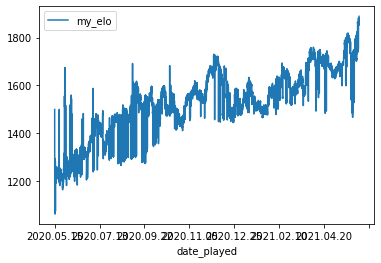

In [7]:
# Visualise the player's elo level over time
df_games.sort_values('date_played').plot(y = 'my_elo', x = 'date_played', kind = 'line')

<AxesSubplot:xlabel='white_opening'>

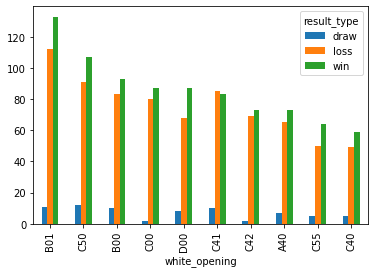

In [8]:
# Visualise the winrate ratio of the player's most played white openings
data = df_games[['white_opening', 'result_type']].value_counts().to_frame().reset_index()
data.columns = ['white_opening', 'result_type', 'count']
data = pd.pivot_table(data, 
                      index = 'white_opening', 
                      columns = 'result_type', 
                      values = 'count', 
                      fill_value = 0)
data.nlargest(10, ['win', 'loss', 'draw'], keep='first').plot(kind = 'bar')

<AxesSubplot:xlabel='black_opening'>

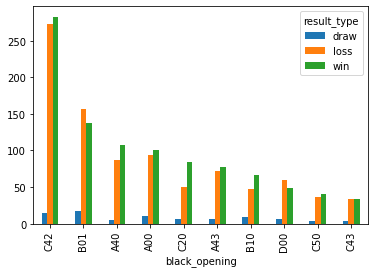

In [9]:
# Visualise the winrate ratio of the player's most played black openings
data = df_games[['black_opening', 'result_type']].value_counts().to_frame().reset_index()
data.columns = ['black_opening', 'result_type', 'count']
data = pd.pivot_table(data, 
                      index = 'black_opening', 
                      columns = 'result_type', 
                      values = 'count', 
                      fill_value = 0)
data.nlargest(10, ['win', 'loss', 'draw'], keep='first').plot(kind = 'bar')

<AxesSubplot:xlabel='elo_diff'>

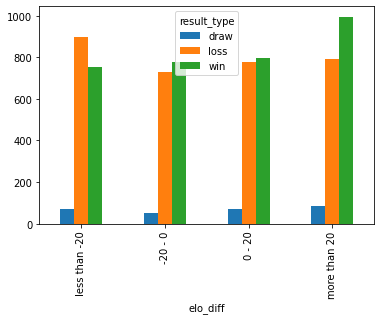

In [10]:
# Visualise the winrate ratio of the player's games based on opponnent's relative strength
def elo_diff_range(row):
    if row['elo_diff'] < -20.0:
        return 'less than -20'
    elif row['elo_diff'] >= -20.0 and row['elo_diff'] < 0.0:
        return '-20 - 0'
    elif row['elo_diff'] >= 0.0 and row['elo_diff'] < 20.0:
        return '0 - 20'
    elif row['elo_diff'] >= 20.0:
        return 'more than 20'

df_games['elo_diff_range'] = df_games.apply(lambda row: elo_diff_range(row), axis = 1)
data = df_games[['elo_diff_range', 'result_type']].value_counts().to_frame().reset_index()
data.columns = ['elo_diff', 'result_type', 'count']
# Sort the values by the desired order
data.elo_diff = data.elo_diff.astype('category').cat.set_categories(
    ['less than -20', '-20 - 0', '0 - 20', 'more than 20'])
data = data.sort_values('elo_diff')
pd.pivot_table(data, 
                      index = 'elo_diff', 
                      columns = 'result_type', 
                      values = 'count', 
                      fill_value = 0).plot(kind = 'bar')